## Lecture 1

In [2]:
import math

In [3]:
math.sin(0)

0.0

In [4]:
from math import cos

In [5]:
cos(0)

1.0

In [6]:
def f(x):
    return x+1

In [7]:
f(3)

4

In [8]:
import numpy as np

In [9]:
x = np.array([1,2,3,4])

In [10]:
print(x)

[1 2 3 4]


In [11]:
x.size

4

In [12]:
x[0]

1

In [15]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [18]:
A.shape

(3, 3)

In [19]:
A[2,2]

9

In [20]:
np.zeros(3)

array([0., 0., 0.])

In [21]:
np.ones(4)

array([1., 1., 1., 1.])

In [22]:
A = np.array([1,2,3]);
B = np.array([3,4,5]);

In [23]:
A+B

array([4, 6, 8])

In [24]:
A+B+1

array([5, 7, 9])

In [25]:
A*B # element-wise product

array([ 3,  8, 15])

In [26]:
A/B

array([0.33333333, 0.5       , 0.6       ])

In [33]:
A = np.array([[1,2,3],[4,5,6]])

In [34]:
np.transpose(A)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [35]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [36]:
A*A

array([[ 1,  4,  9],
       [16, 25, 36]])

In [38]:
A@np.transpose(A) # * element to element  @ dot product

array([[14, 32],
       [32, 77]])

In [39]:
def relu(x):
    if x>0:
        return x
    else:
        return 0

In [1]:
x = np.array([1,-1]);
relu(x)

NameError: name 'np' is not defined

## Lecture 2

### Linear Algebra

In [1]:
from numpy import linalg as LA
import numpy as np

In [2]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
LA.matrix_rank(A)

2

In [3]:
b = np.array([1,1,1])
x = LA.solve(A,b)
print(x)

[-2.5  4.  -1.5]


In [4]:
Ainv = LA.inv(A)

In [5]:
print(Ainv)

[[-4.50359963e+15  9.00719925e+15 -4.50359963e+15]
 [ 9.00719925e+15 -1.80143985e+16  9.00719925e+15]
 [-4.50359963e+15  9.00719925e+15 -4.50359963e+15]]


In [6]:
LA.det(A)

6.66133814775094e-16

In [7]:
w,v = LA.eig(A)

In [8]:
print("eigenvalues:\n",w)
print("eigenvectors:\n",v)   # notice: eigenvector is a row vector

eigenvalues:
 [ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
eigenvectors:
 [[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


### Randomness

In [9]:
from numpy import random

#### Random Integers

In [10]:
# random.randint
N = 20
X = np.zeros(N)
for i in range(N):
    X[i] = random.randint(1,7)   # from 1 (inclusive) to 7(exclusive)
print(X)

[2. 2. 4. 2. 2. 5. 3. 6. 4. 5. 3. 4. 6. 4. 4. 5. 2. 1. 6. 3.]


### Uniform distribution
The easiest distribution is the uniform distribution on $(0,1)$, in which all numbers in a given interval are equally likely. We can use the function `random.random()` that will produce a uniformly distributed random number in $(0,1)$. Furthermore, we can turn this uniform random number from $(0,1)$ into random numbers from $a$ to $b$.

In [11]:
random.seed(1)
# the seed will initialize the random number generator
# fixing the seed will fixed the "random" number generated
for i in range(5):
    r = random.random()
    print(r)

0.417022004702574
0.7203244934421581
0.00011437481734488664
0.30233257263183977
0.14675589081711304


In [12]:
def rnum(a,b):
    return a+(b-a)*random.random()

for i in range(10):
    print(rnum(-5,5))

-4.0766140523120225
-3.137397886223291
-1.5443927295695223
-1.0323252576933006
0.38816734003356945
-0.8080548559670522
1.8521950039675952
-2.9554775026848255
3.7811743639094537
-4.726124068020738


In [13]:
import matplotlib.pyplot as plt

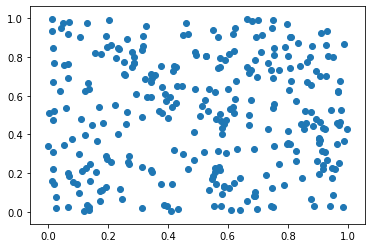

In [14]:
N = 300
x = np.random.uniform(0,1,N)
y = np.random.uniform(0,1,N)
plt.scatter(x,y)
plt.show()

### Adding scattered noise to a linear fucntion

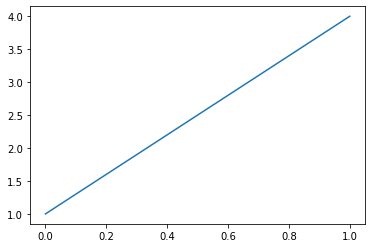

In [15]:
X = np.linspace(0,1,100)
Y = 3*X + 1
plt.plot(X,Y)
plt.show()

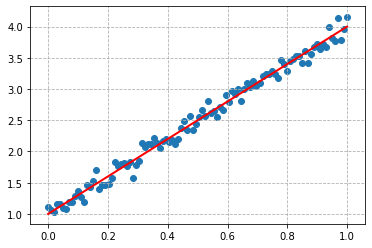

In [22]:
# add some noise
Z = 3*X + 1 + np.random.normal(loc=0, scale=0.1, size= X.shape[0])
# loc is mean
# scale is standard dev
# size is the number of samples we draw in this distribution
plt.scatter(X,Z)
plt.plot(X,Y, color = "red", linewidth= 2.0)
plt.grid(True, linestyle = 'dashed')
plt.show()

### Normal distribution

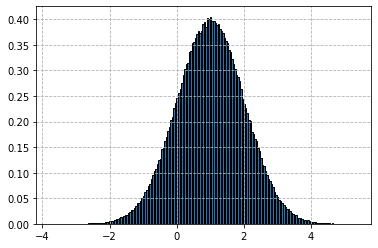

In [28]:
N = 500000   #no. of samples
mu = 1.0
sigma = 1.0
X = np.random.normal(loc=mu, scale= sigma, size=N)
plt.hist(X, bins=200, density=True, edgecolor= 'k')
# plt.hist()
# bin size = (total sample)/(no. of bins)
plt.grid(True, linestyle = 'dashed')
plt.show()

### Gradient descent: an example
Suppose $f(x,y) = x^{2}+4y^{2}+4x+y+6$. Use gradient descent method to find its minimizer.

Algorithm:

> Choose initial point $x_{0}$

> For k=0,1,$\cdots$,M

> $(x_{k+1}, y_{k+1})=(x_{k},y_{k}) - \eta \nabla f(x_{k},y_{k})$

Here for simplicity we only consider a fixed number of steps


In [29]:
f = lambda x,y : x*x + 2*y*y + 4*x + y + 6
partialfx = lambda x,y : 2*x + 4
partialfy = lambda x,y : 4*y + 1

# Choose an initial data (10,10) no reason
x,y = 10,10

# eta is called "learning rate" in machine learning
eta = 0.1

# total number of steps
num_steps = 200

# store all the intermediate values during the descents:
x_vals = np.zeros(num_steps)
y_vals = np.zeros(num_steps)
f_vals = np.zeros(num_steps)

for i in range(num_steps):
    # update x and y
    dx = partialfx(x,y)
    dy = partialfy(x,y)
    x = x - eta * dx
    y = y - eta * dy
    
    # store the x,y and f(x,y) values for later use
    x_vals[i] = x
    y_vals[i] = y
    f_vals[i] = f(x,y)

In [30]:
x_vals.shape

(200,)

Local minimum of f(x,y): 1.875 at point (-1.9999999999999996, -0.24999999999999997)


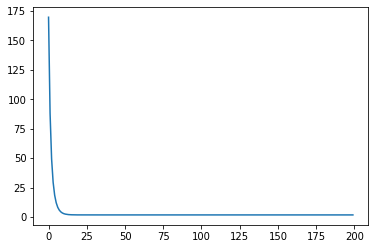

In [31]:
print("Local minimum of f(x,y):", f(x,y), "at point", (x,y))
# Let's see what the f(x,y) values were
plt.plot(range(num_steps), f_vals)
plt.show()

Let's also visualize what happens on a contour graph

This is the graph of $f$. The curve are the solution to $f(x,y) = c$ where c is the labeled number on each curve.

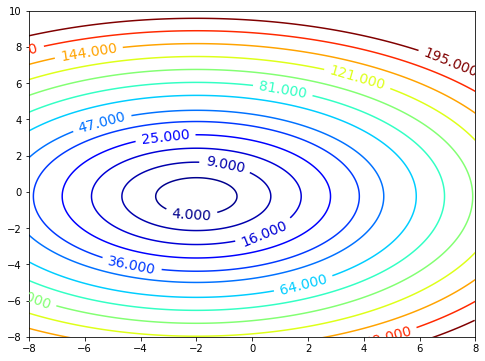

In [38]:
X = np.linspace(-10, 10, 300)
Y = np.linspace(-10, 10, 300)
X,Y = np.meshgrid(X,Y)
Z = f(X,Y)

plt.figure(figsize=(8,6))
CS = plt.contour(X, Y, Z, [1,4,9,16,25,36,47,64,81,100,121,144,169,195], cmap='jet')
plt.axis([-8,8,-8,10])
plt.clabel(CS, inline=True, fontsize=14)
plt.show()

Let's include the arrow for how gradient descent moves us.

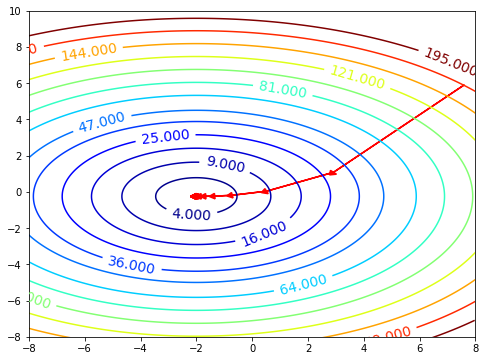

In [40]:
plt.figure(figsize=(8,6))
CS = plt.contour(X, Y, Z, [1,4,9,16,25,36,47,64,81,100,121,144,169,195], cmap='jet')
plt.axis([-8,8,-8,10])
plt.clabel(CS, inline=True, fontsize=14)
# add some arrows
delta_n = 3
for i in range(0,99,delta_n):
    plt.arrow(x_vals[i], y_vals[i],(x_vals[i+delta_n] - x_vals[i]),
              (y_vals[i+delta_n] - y_vals[i]),
             head_width=0.3, head_length=0.2, linewidth=1.5, color='red')
plt.show()